In [33]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing loan data into dataframe

loandata = pd.read_csv("C:\\Users\\mohjaved5\\Downloads\\loan\\loan.csv")
loandata.head()

C:\Users\mohjaved5\AppData\Local\Temp\ipykernel_28544\644426005.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loandata = pd.read_csv("C:\\Users\\mohjaved5\\Downloads\\loan\\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Getting unique values in 'loan_status' column
loandata['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [5]:
# Creating a new column 'has_defaulted' which is 0 if loan is fully paid or current else 1 if charged off

loandata['has_defaulted'] = loandata['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

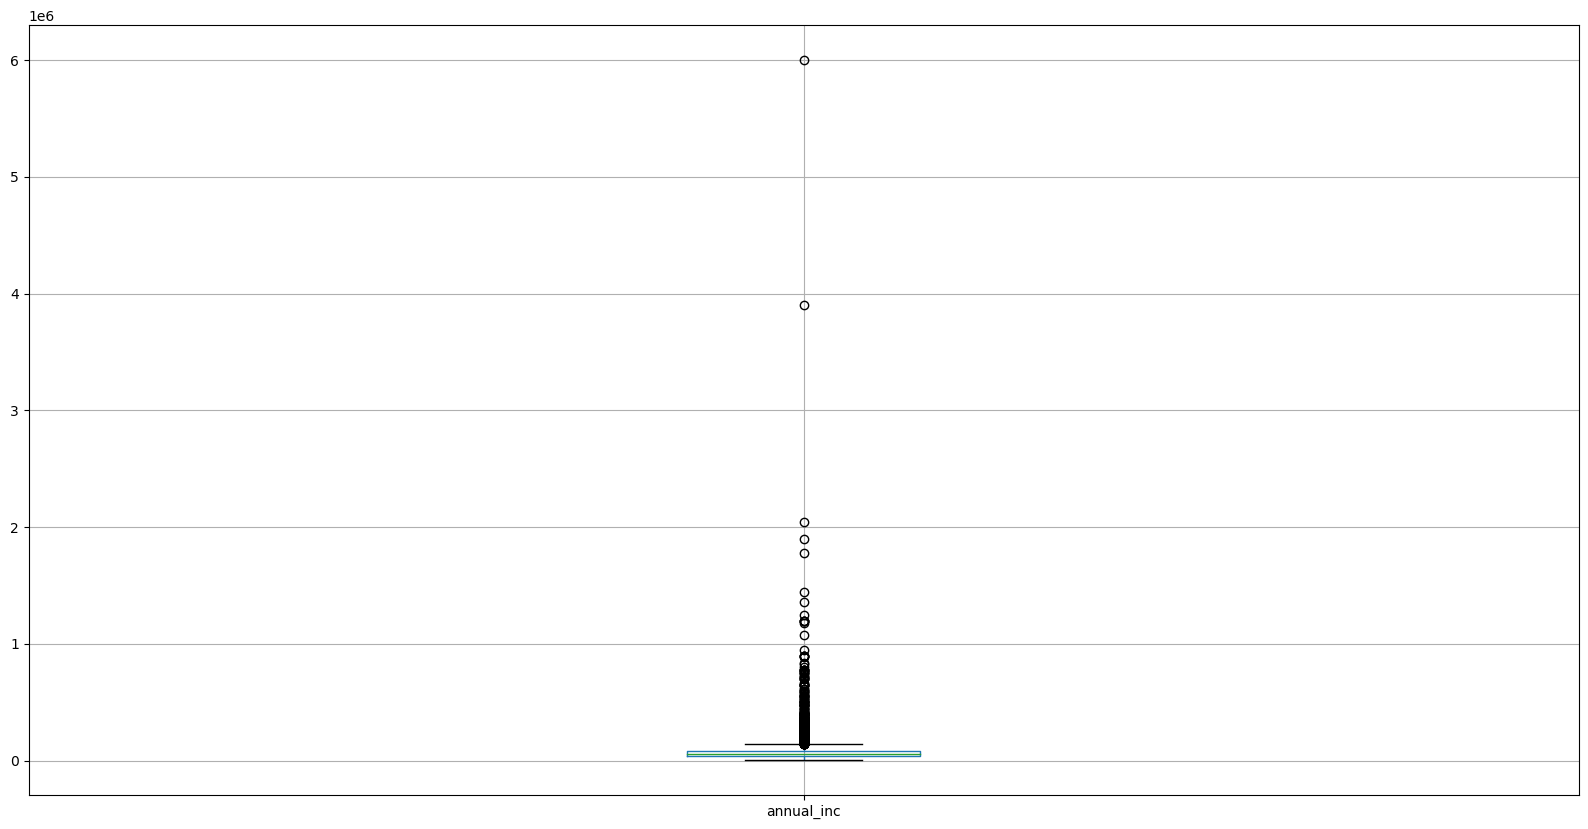

In [6]:
# Analyzing distribution of annual_inc column using box plot

loandata.boxplot('annual_inc', figsize=(20,10))
plt.show()

In [7]:
# As seen in above figure, there are huge numbers of outliers in annual_inc column
# Removing outliers from loandata data set
# using formula IQR*1.5 + Q3 to detect outliers

(loandata['annual_inc'].quantile(0.75)-loandata['annual_inc'].quantile(0.25)) * 1.5 + loandata['annual_inc'].quantile(0.75)



145144.0

In [8]:
#removing annual_inc beyond 145144.0 as they are outliers

loandata_annual_inc_outliers_removed = loandata[loandata['annual_inc'] < 145144.0]

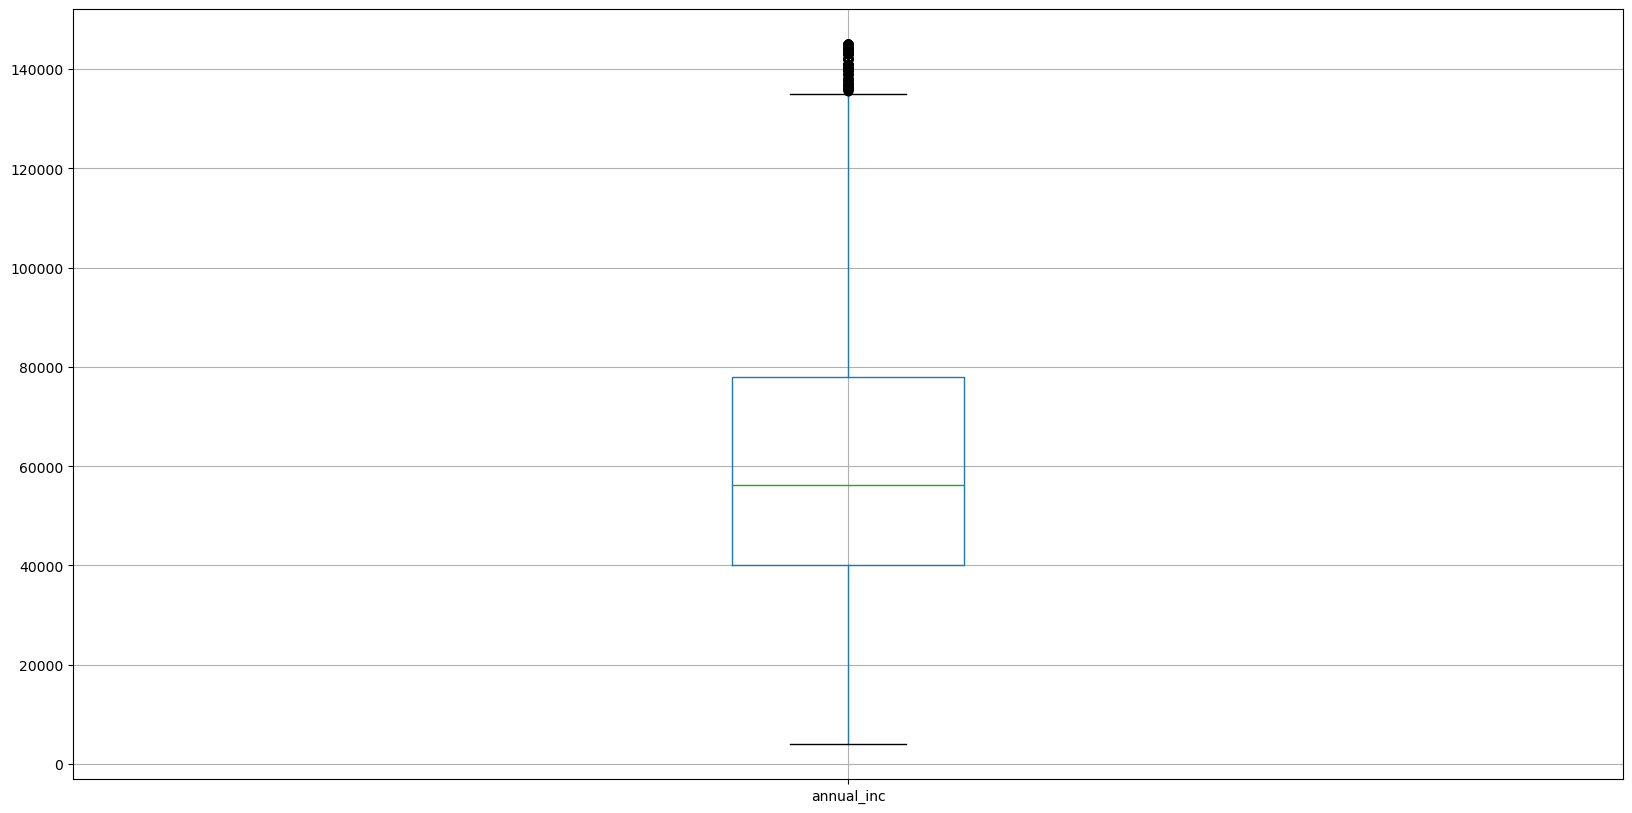

In [9]:
# analyzing distribution of annual income after removing outliers

loandata_annual_inc_outliers_removed.boxplot('annual_inc', figsize=(20,10))
plt.show()

In [16]:
 # Creating a new column 'income_range' to place annual income in ranges 

loandata_annual_inc_outliers_removed['salary_range'] = pd.cut(loandata_annual_inc_outliers_removed['annual_inc'], bins = 8, labels = ['less than 20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', 'above 140k'])

C:\Users\mohjaved5\AppData\Local\Temp\ipykernel_28544\529017003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loandata_annual_inc_outliers_removed['salary_range'] = pd.cut(loandata_annual_inc_outliers_removed['annual_inc'], bins = 8, labels = ['less than 20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', 'above 140k'])


In [15]:
loandata_annual_inc_outliers_removed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,has_defaulted,salary_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,less than 20k
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,20k-40k
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,less than 20k
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,40k-60k
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,60k-80k


In [17]:
# Affect of annual income on default rate

defaulters_grouped_by_salary_table = loandata_annual_inc_outliers_removed.groupby('salary_range').agg({'has_defaulted': [np.mean]})
defaulters_grouped_by_salary_table.head()

,has_defaulted
,mean
salary_range,
less than 20k,0.198107
20k-40k,0.174319
40k-60k,0.148880
60k-80k,0.138752
80k-100k,0.123851


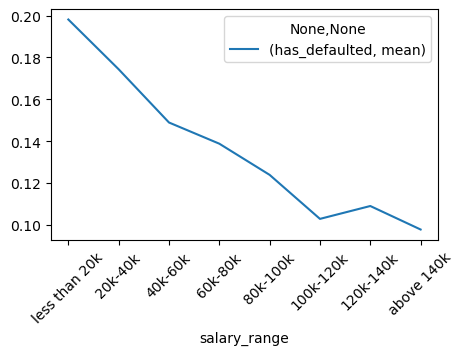

In [23]:
defaulters_grouped_by_salary_table.plot(kind='line', figsize=(5, 3), rot=45)
plt.show()
#We could see a reverse trend 

In [26]:
# Analyzing default rate on basis of home ownership
loandata_annual_inc_outliers_removed['home_ownership'].value_counts()


RENT        18469
MORTGAGE    16367
OWN          2942
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [27]:
# Removing data with home ownership as NONE
loandata_annual_inc_outliers_removed = loandata_annual_inc_outliers_removed[loandata_annual_inc_outliers_removed['home_ownership'] != 'NONE']
loandata_annual_inc_outliers_removed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,has_defaulted,salary_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,20k-40k
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,20k-40k
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,less than 20k
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,40k-60k
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,80k-100k


In [29]:
# Grouping defaulters by home ownership

defaulters_grouped_by_homeownership = loandata_annual_inc_outliers_removed.groupby('home_ownership').agg({'has_defaulted': [np.mean]})
defaulters_grouped_by_homeownership.head()

,has_defaulted
,mean
home_ownership,
MORTGAGE,0.134661
OTHER,0.182796
OWN,0.148199
RENT,0.150198


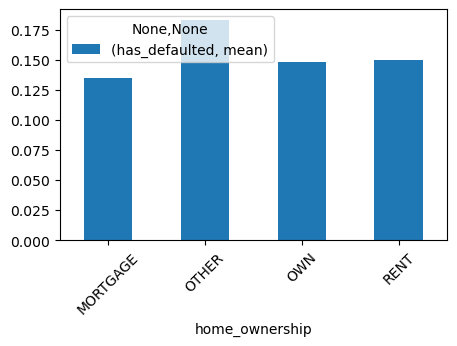

In [30]:
defaulters_grouped_by_homeownership.plot(kind='bar', figsize=(5, 3), rot=45)
plt.show()

In [31]:
#Study combined effect of home ownership and income range on default percent
defaultrate_vs_homeownership = pd.pivot_table(loandata_annual_inc_outliers_removed, values = 'has_defaulted' , index=['salary_range'],columns = ['home_ownership'], aggfunc=np.mean)
defaultrate_vs_homeownership.head(40)

home_ownership,MORTGAGE,OTHER,OWN,RENT
salary_range,,,,
less than 20k,0.180328,0.000000,0.176923,0.205855
20k-40k,0.173181,0.263158,0.159472,0.177002
40k-60k,0.153443,0.150000,0.149686,0.145671
60k-80k,0.139351,0.260870,0.139241,0.137210
80k-100k,0.125289,0.133333,0.125850,0.121303
100k-120k,0.099454,0.142857,0.112782,0.108924
120k-140k,0.102603,0.000000,0.131313,0.122047
above 140k,0.098408,0.000000,0.132075,0.088106


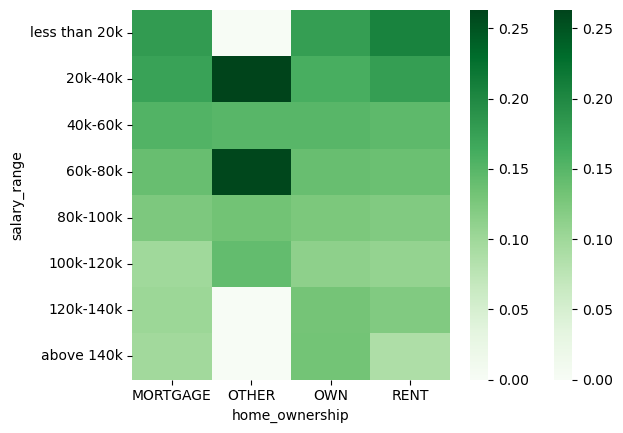

In [35]:
# plotting heatmap for above pivot table
sns.heatmap(defaultrate_vs_homeownership, cmap='Greens')
plt.show()

In [38]:
# Study affect of loan term on default rate 

default_rate_by_term = loandata_annual_inc_outliers_removed.groupby('term').agg({'has_defaulted': ['mean']})
default_rate_by_term.head()

,has_defaulted
,mean
term,
36 months,0.112089
60 months,0.230271


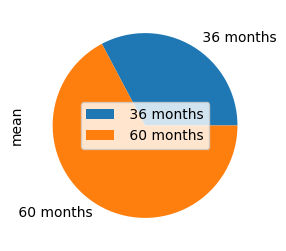

In [40]:
#Plotting pie chart 

default_rate_by_term.plot(kind='pie', y='has_defaulted',figsize=(5, 3))
plt.show()

 Most people having 60 months loan tenure have defaulted as compared to people with 30 month loan tenure

Now we study the combined affect of loan tenure and salary ranges

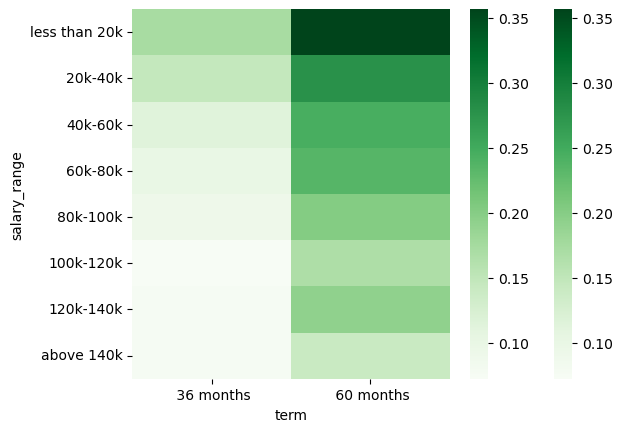

In [42]:
termtable = pd.pivot_table(loandata_annual_inc_outliers_removed, values = 'has_defaulted' , index=['salary_range'],columns = ['term'], aggfunc=np.mean)
sns.heatmap(termtable, cmap='Greens')
plt.show()

From above heatmap we get that people with low anuual income and high loan tenure default more than people with high annual income and less loan tenure

Now we will analyze impact of debt to income ratio on default rate

In [44]:
#analyzing debt to income ratio on 
loandata['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

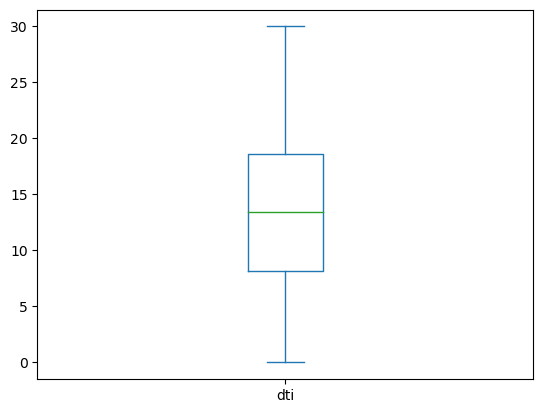

In [45]:
#analyzing spread of debt to income ratio
loandata['dti'].plot.box()
plt.show()

Most people have debt to income ratio between 10 to 20

In [46]:
#Putting debt to income ration in buckets
loandata_annual_inc_outliers_removed['dti_range'] = pd.cut(loandata_annual_inc_outliers_removed['dti'], bins = 6, labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])
loandata_annual_inc_outliers_removed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,has_defaulted,salary_range,dti_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,20k-40k,25-30
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,20k-40k,0-5
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,less than 20k,5-10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,40k-60k,20-25
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,80k-100k,15-20


In [47]:
#creating table to map debt to income ration and default rate

dti_range_table = pd.pivot_table(data = loandata_annual_inc_outliers_removed, values='has_defaulted', index=['dti_range'], aggfunc=np.mean)
dti_range_table.head()

,has_defaulted
dti_range,
0-5,0.124920
5-10,0.126272
10-15,0.143084
15-20,0.152985
20-25,0.164659


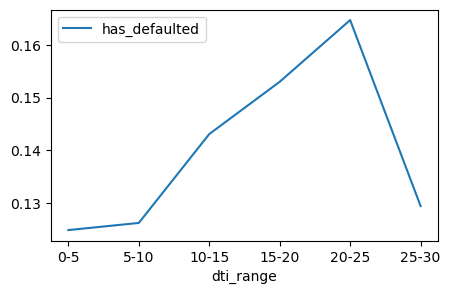

In [52]:
# plotting line chart to analyze impact of debt to income ratio on default rate 

dti_range_table.plot(kind='line', figsize=(5, 3), rot=0)
plt.show()

From above line chart we get to know that with increasing debt to income ratio the default rate also increases upto range 20-25 but drops at range 25-30. This drop might be explained with a reason that people with very high debt to income ratio dont want to increase their debt further so they mostly pay off thier loans